# Task 2: Performing datacleaning and EDA on Titanic dataset

In [1]:
import pandas as pd
df = pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Check for missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Filling missing values for 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Filling missing values for 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Dropping the 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Verify missing values are handled
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
dtype: object

In [7]:
# Summary statistics
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.0,891.0,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,2.0,3.0,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,0.0,3.0,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,549.0,491.0,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,NaN,NaN,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,NaN,NaN,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,NaN,NaN,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,NaN,NaN,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


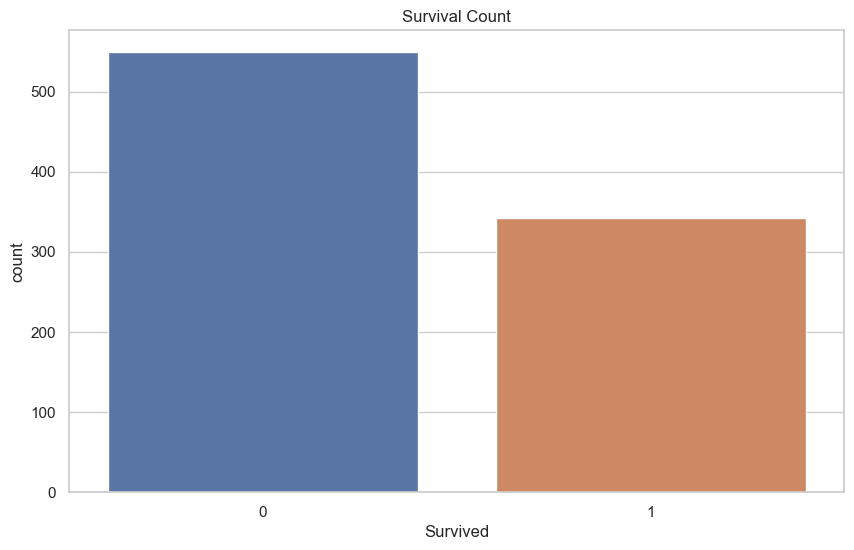

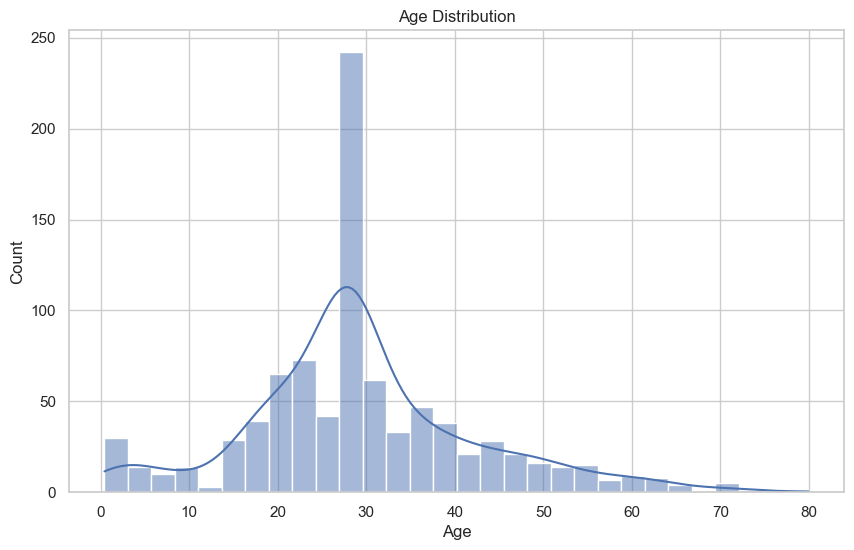

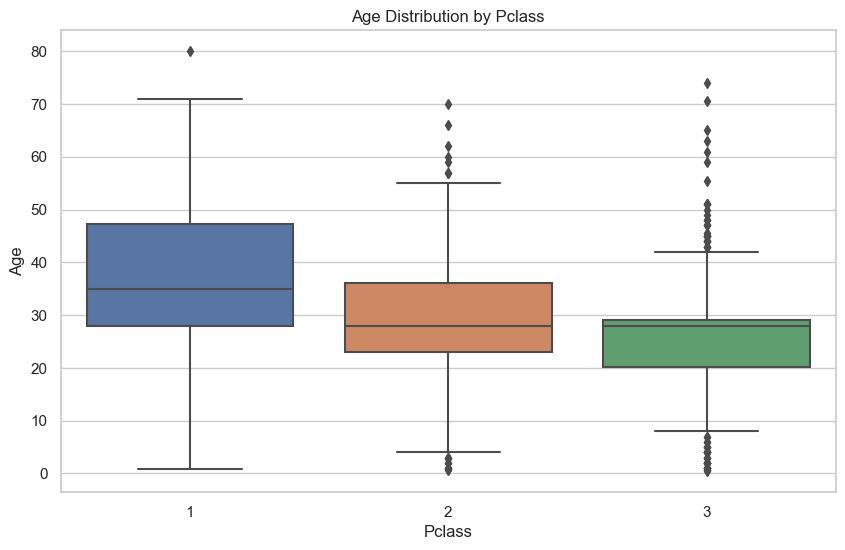

C:\Users\dhana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

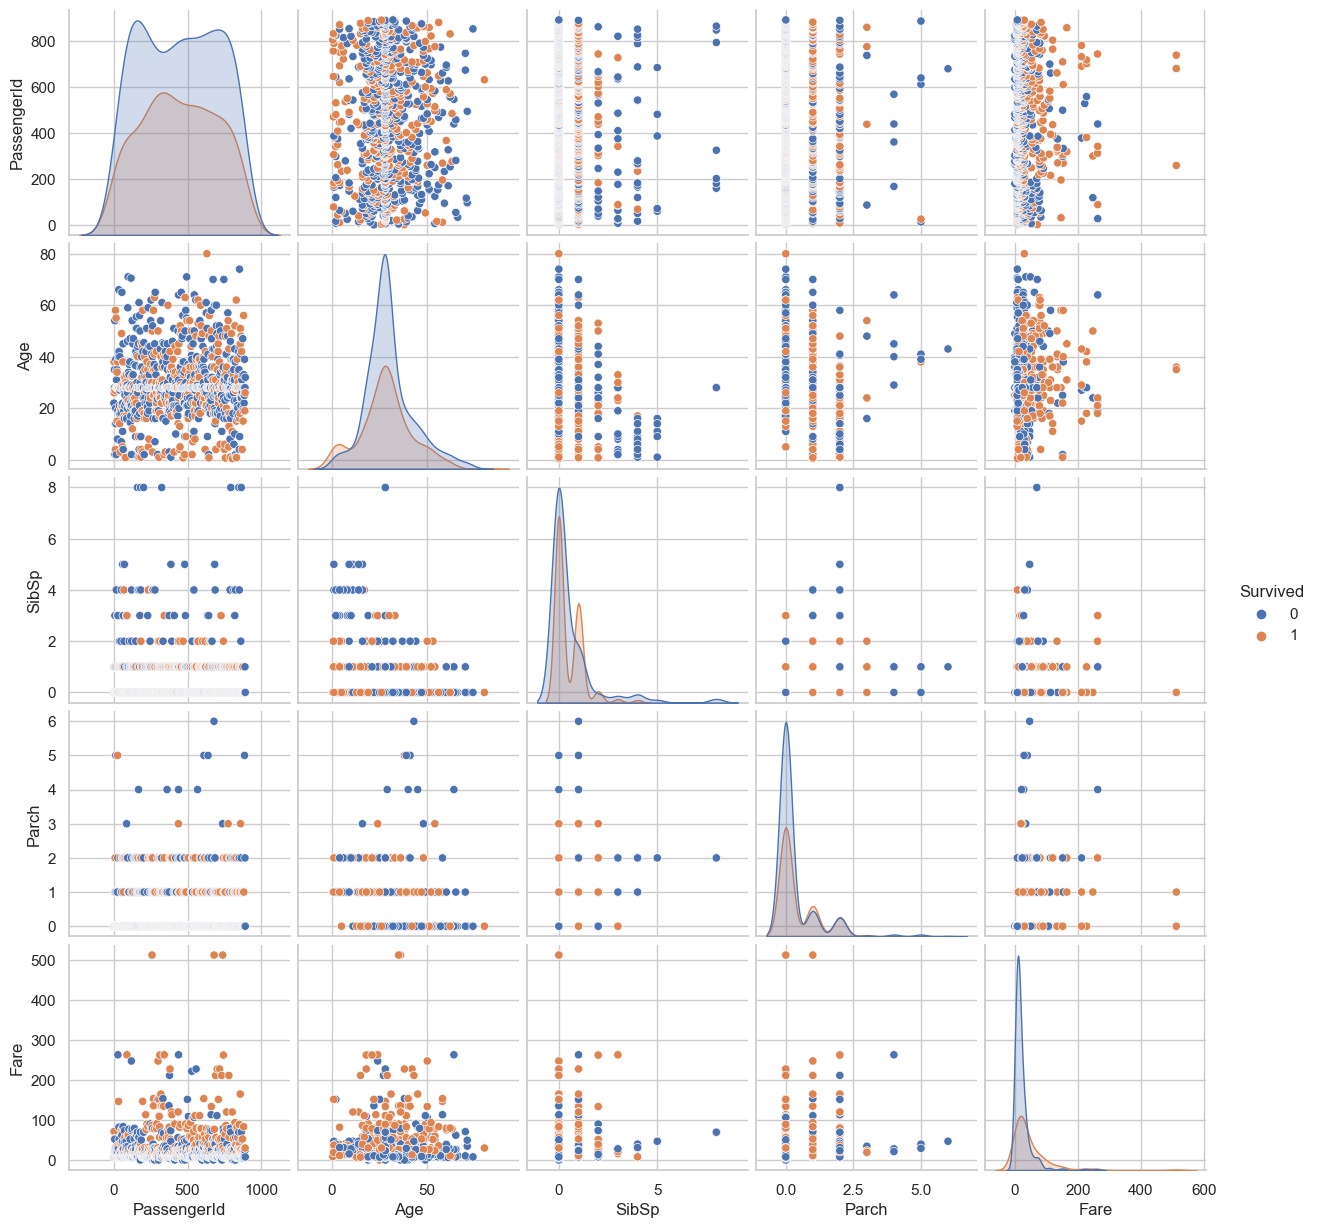

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Count plot for survival
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Box plot to examine the distribution of age by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.show()

# Pairplot to explore relationships between features
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()


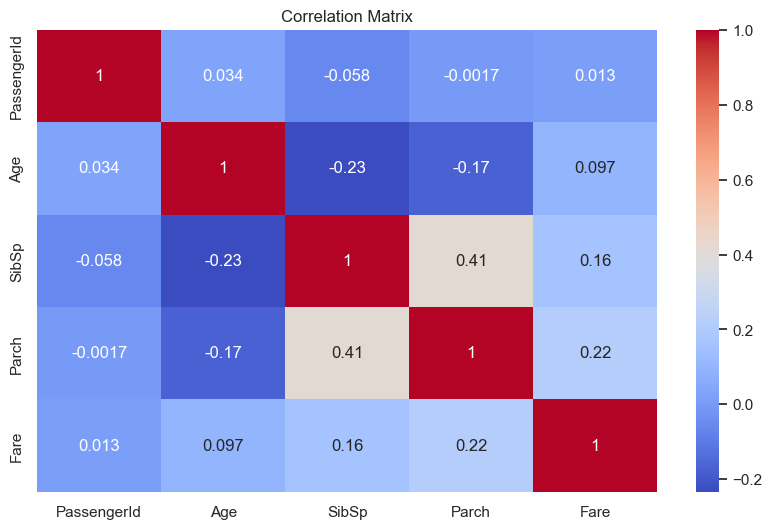

In [10]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


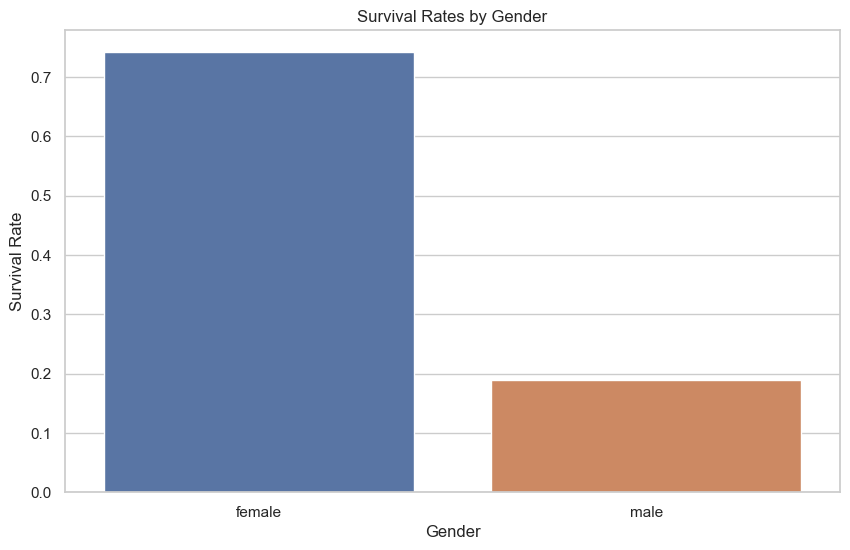

In [15]:
# Ensure the 'Survived' column is numeric for mean calculation
df['Survived'] = pd.to_numeric(df['Survived'])

# Survival rates by gender
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(survival_by_gender)


# Visualization for survival rates by gender
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title('Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


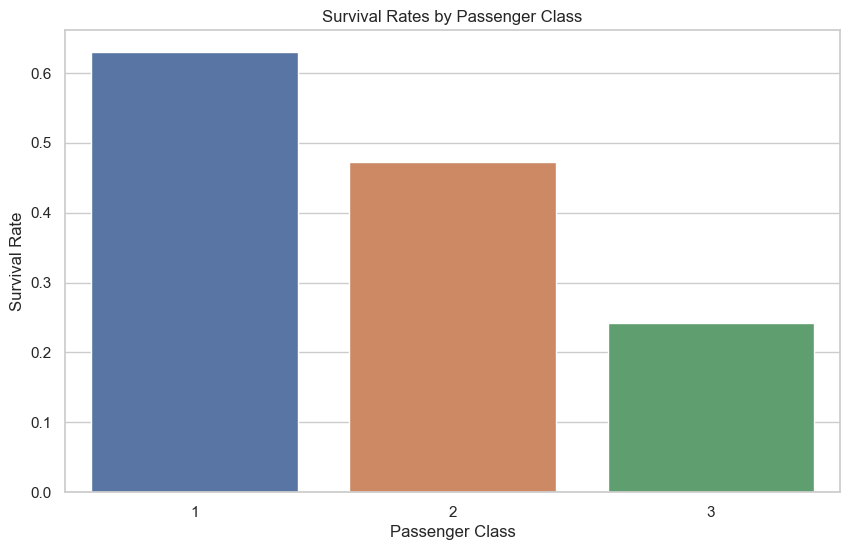

In [16]:

# Survival rates by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

# Visualization for survival rates by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rates by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()